In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
# Reading csv file into dataframe
myopia_df = pd.read_csv("Resources/myopia.csv")
myopia_df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Checking for null values
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")
    
    

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [4]:
# Find duplicate entries if any
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
#Removing the target class from the dataframe to keep classification features only
myopia_df1 = myopia_df.drop("MYOPIC", axis = 1)
myopia_df1.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
#LIST COLUMNS
myopia_df1.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [7]:
# Using scalar transform to scale the features into same order

scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df1[["AGE", "SPHEQ", "AL", "ACD", "LT", "VCD", "SPORTHR",
                                              "READHR", "COMPHR", "STUDYHR", "TVHR", "DIOPTERHR"]])


In [8]:
#Creating new dataframe with transformed data
myopia_dfT = pd.DataFrame(scaled_data, columns = myopia_df1.columns[0:12])
myopia_dfT.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503


In [9]:
#adding unscaled columns to the datafram
myopia_dfT["MOMMY"] = myopia_df1["MOMMY"]
myopia_dfT["DADMY"] = myopia_df1["DADMY"]
myopia_dfT.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0


#### For this problem we want to retain 90% of explained variance in the original data set while reducing the dimensionality using principal component analysis (PCA). 

In [10]:
# applying dimensionality reduction using PCA, starting from two components
pca = PCA(n_components = 2)
myopia_pca = pca.fit_transform(myopia_dfT)

In [11]:
#convert PCA data into dataframe
myopia_pca_df = pd.DataFrame(
    data = myopia_pca, columns = ["principal_component_1", "principal_component_2"])

myopia_pca_df.head()

,principal_component_1,principal_component_2
0,0.509064,1.240002
1,-0.659781,-1.479657
2,-0.905146,-0.816177
3,0.117579,1.143982
4,-0.406560,-2.788647


In [12]:
# fetching explained variance
pca.explained_variance_ratio_

array([0.23709653, 0.17470773])

#### with two principal components, about 82% of the information from original datasets is retained.

In [13]:
# Incerasing the number of components to 3
pca = PCA(n_components = 3)
myopia_pca = pca.fit_transform(myopia_dfT)

In [14]:
#convert PCA data into dataframe
myopia_pca_df = pd.DataFrame(
    data = myopia_pca, columns = ["principal_component_1", "principal_component_2","principal_component_3"])

myopia_pca_df.head()

,principal_component_1,principal_component_2,principal_component_3
0,0.509064,1.240002,0.756795
1,-0.659781,-1.479657,-0.443546
2,-0.905146,-0.816177,0.736691
3,0.117579,1.143982,-0.978658
4,-0.406560,-2.788647,0.560417


In [15]:
# fetching explained variance
pca.explained_variance_ratio_

array([0.23709653, 0.17470773, 0.09439418])

#### With three principal components, more than 90% of the explained variance is retained. So we will use three components for this analysis. 

In [16]:
#Initializing t-SNE mdoel
tsne = TSNE(learning_rate = 35)



In [17]:
#Further reduce dimension using TSNE
tsne_features = tsne.fit_transform(myopia_pca_df)
tsne_features.shape

C:\ProgramData\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

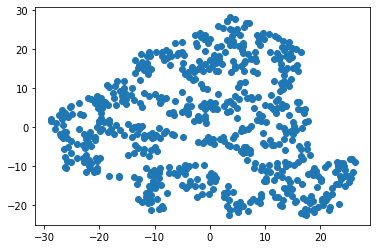

In [18]:
#Plotting the t-SNE fitted dataset
myopia_tsne_df = myopia_pca_df
myopia_tsne_df["x"] = tsne_features[:, 0]
myopia_tsne_df["y"] = tsne_features[:,1]

plt.scatter(myopia_tsne_df["x"], myopia_tsne_df["y"]) 
plt.show()

In [19]:
#counting the labels
labels = myopia_df["MYOPIC"]
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

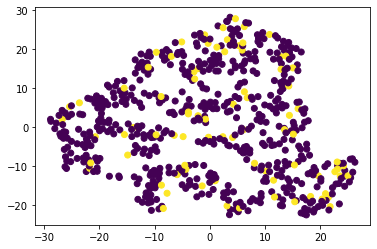

In [20]:
plt.scatter(myopia_tsne_df["x"], myopia_tsne_df["y"], c = labels) 
#plt.scatter(myopia_tsne_df["principal_component_2"], myopia_pca_df["principal_component_3"], c = labels) 
plt.show()

In [22]:
#removing the tsne columns
myopia_pca_only = myopia_pca_df.drop(["x","y"], axis =1)
myopia_pca_only.head()

,principal_component_1,principal_component_2,principal_component_3
0,0.509064,1.240002,0.756795
1,-0.659781,-1.479657,-0.443546
2,-0.905146,-0.816177,0.736691
3,0.117579,1.143982,-0.978658
4,-0.406560,-2.788647,0.560417


In [23]:
# using elbow curve to identify best numbers of clusters
inertia = []
k = list(range(1,12))

#Calculating hte inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state = 0)
    km.fit(myopia_pca_only)
    #km.fit(myopia_dfT)
    inertia.append(km.inertia_)
    
    
#creating the elbow plot 
elbow_data = {"k":k, "inertia":inertia}
myopia_elbow = pd.DataFrame(elbow_data)
myopia_elbow.head()



C:\ProgramData\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,3910.368998
1,2,2757.970929
2,3,2000.573083
3,4,1709.305221
4,5,1510.023101


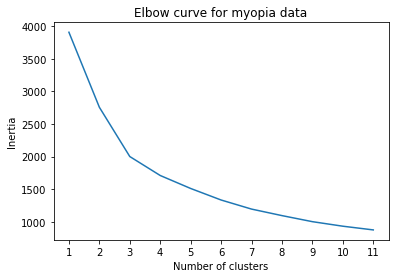

In [24]:
#plot the elbow curve to find best candidate for k
plt.plot(myopia_elbow["k"], myopia_elbow["inertia"] )
plt.xticks(range(1,12))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

In [25]:
#defining a function for calculating class for given values of clusters
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [26]:
# based on elbow curve, three clusters might be best one. 

#fitting the model with n_clusters = 3
clusters_data = get_clusters(3, myopia_pca_only)

In [27]:
clusters_data

,principal_component_1,principal_component_2,principal_component_3,class
0,0.509064,1.240002,0.756795,2
1,-0.659781,-1.479657,-0.443546,0
2,-0.905146,-0.816177,0.736691,1
3,0.117579,1.143982,-0.978658,1
4,-0.406560,-2.788647,0.560417,0
...,...,...,...,...
613,-0.247551,1.236232,1.057921,1
614,-0.683738,-1.706879,0.031351,0
615,-0.922604,-2.238506,-0.465412,0
616,-1.095900,0.377733,0.733235,1


In [32]:
#defining a function to plot clusters
def show_clusters(df):
    plt.scatter(df['principal_component_1'], df['principal_component_2'], c=df['class'])
    plt.xlabel('principal_component_1')
    plt.ylabel('principal_component_2')
    plt.show()

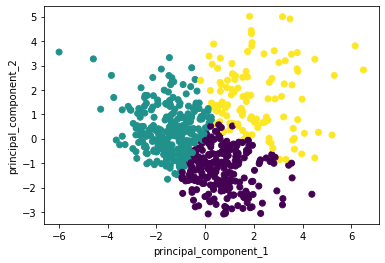

In [33]:
show_clusters(clusters_data)

#### This shows the clear distinction among the classes when three classes (based on elbow curve) are chosen with Kmeans clustering on PCA data. 